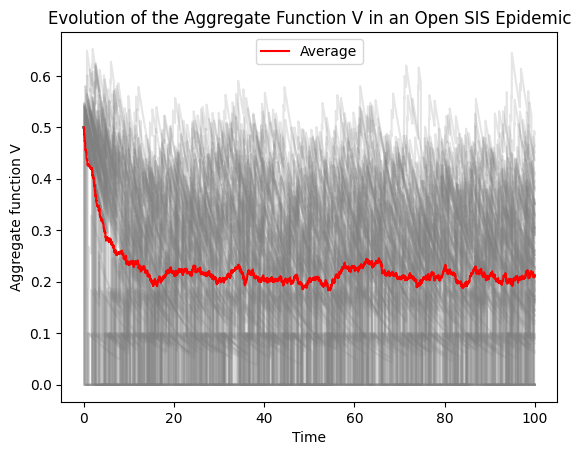

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define the parameters
mu_d = 0.1  # Departure rate
mu_a = 0.5  # Arrival rate
delta_bar = 0.1  # Recovery rate
beta_bar = 0.1  # Infection rate
t_max = 100  # Maximum simulation time
dt = 0.01  # Time step
num_realizations = 100  # Number of realizations for averaging

# Define functions for f, ga, and gd
def f(V):
    return -delta_bar * V

def ga(V):
    return beta_bar * (1 - V)

def gd(V):
    return -V

# Simulation function
def simulate_SDE():
    V = [0.5]  # Initial value of the aggregate function
    t = [0]  # Initial time
    N_a = poisson(mu_a * dt).rvs(size=int(t_max / dt))
    N_d = poisson(mu_d * dt).rvs(size=int(t_max / dt))

    for i in range(1, int(t_max / dt)):
        V_prev = V[-1]
        t_prev = t[-1]

        dV = f(V_prev) * dt

        if N_a[i] > 0:
            dV += ga(V_prev) * N_a[i]

        if N_d[i] > 0:
            dV += gd(V_prev) * N_d[i]

        V.append(V_prev + dV)
        t.append(t_prev + dt)

    return t, V

# Perform multiple realizations
all_V = []
for _ in range(num_realizations):
    t, V = simulate_SDE()
    all_V.append(V)
    plt.plot(t, V, color='gray', alpha=0.2)

# Calculate the average
average_V = np.mean(all_V, axis=0)

# Plot the average
plt.plot(t, average_V, color='red', label='Average')
plt.xlabel('Time')
plt.ylabel('Aggregate function V')
plt.title('Evolution of the Aggregate Function V in an Open SIS Epidemic')
plt.legend()
plt.show()


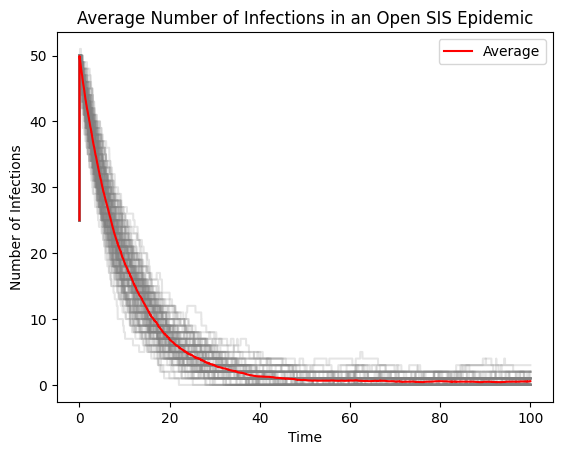

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define the parameters
mu_d = 0.1  # Departure rate
mu_a = 0.1  # Arrival rate
delta_bar = 0.1  # Recovery rate
beta_bar = 0#0.1  # Infection rate
t_max = 100  # Maximum simulation time
dt = 0.01  # Time step
num_realizations = 100  # Number of realizations for averaging

# Initialize the number of agents
initial_agents = 50
infection_prob_mean = 0.5  # Mean infection probability for new arrivals
infection_prob_std = 0.1   # Std deviation of infection probability for new arrivals

# Simulation function
def simulate_SIS():
    t = [0]
    num_infections = [initial_agents * infection_prob_mean]
    agents = [1] * initial_agents  # Start with all agents infected
    
    N_a = poisson(mu_a * dt).rvs(size=int(t_max / dt))
    N_d = poisson(mu_d * dt).rvs(size=int(t_max / dt))
    
    for i in range(1, int(t_max / dt)):
        t_prev = t[-1]
        infected_agents = np.sum(agents)
        total_agents = len(agents)

        # Recovery
        recovery_events = np.random.binomial(1, delta_bar * dt, size=total_agents)
        agents = [max(0, agents[j] - recovery_events[j]) for j in range(total_agents)]

        # Infection
        infection_events = np.random.binomial(1, beta_bar * infected_agents / total_agents * dt, size=total_agents)
        agents = [min(1, agents[j] + infection_events[j]) for j in range(total_agents)]

        # Arrival
        if N_a[i] > 0:
            for _ in range(N_a[i]):
                new_agent_infection_prob = np.clip(np.random.normal(infection_prob_mean, infection_prob_std), 0, 1)
                agents.append(np.random.binomial(1, new_agent_infection_prob))

        # Departure
        if N_d[i] > 0 and total_agents > 1:
            departing_indices = np.random.choice(range(total_agents), N_d[i], replace=False)
            agents = [agents[j] for j in range(total_agents) if j not in departing_indices]

        t.append(t_prev + dt)
        num_infections.append(np.sum(agents))

    return t, num_infections

# Perform multiple realizations
all_infections = []
for _ in range(num_realizations):
    t, infections = simulate_SIS()
    all_infections.append(infections)
    plt.plot(t, infections, color='gray', alpha=0.2)

# Calculate the average
average_infections = np.mean(all_infections, axis=0)

# Plot the average
plt.plot(t, average_infections, color='red', label='Average')
plt.xlabel('Time')
plt.ylabel('Number of Infections')
plt.title('Average Number of Infections in an Open SIS Epidemic')
plt.legend()
plt.show()


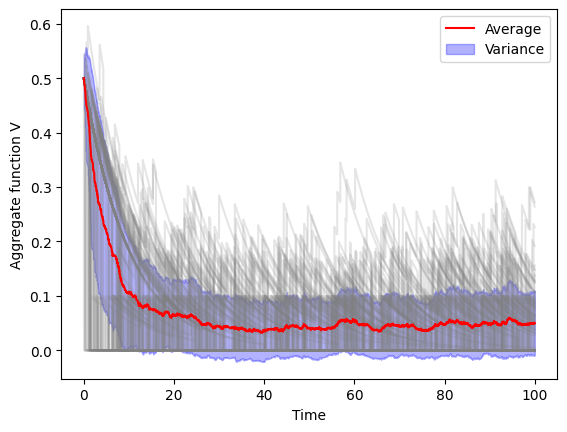

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define the parameters
mu_d = 0.1  # Departure rate
mu_a = 0.1  # Arrival rate
delta_bar = 0.1  # Recovery rate
beta_bar = 0.1  # Infection rate
t_max = 100  # Maximum simulation time
dt = 0.01  # Time step
num_realizations = 100  # Number of realizations for averaging

# Define functions for f, ga, and gd
def f(V):
    return -delta_bar * V

def ga(V):
    return beta_bar * (1 - V)

def gd(V):
    return -V

# Simulation function
def simulate_SDE():
    V = [0.5]  # Initial value of the aggregate function
    t = [0]  # Initial time
    N_a = poisson(mu_a * dt).rvs(size=int(t_max / dt))
    N_d = poisson(mu_d * dt).rvs(size=int(t_max / dt))

    for i in range(1, int(t_max / dt)):
        V_prev = V[-1]
        t_prev = t[-1]

        dV = f(V_prev) * dt

        if N_a[i] > 0:
            dV += ga(V_prev) * N_a[i]

        if N_d[i] > 0:
            dV += gd(V_prev) * N_d[i]

        V.append(V_prev + dV)
        t.append(t_prev + dt)

    return t, V

# Perform multiple realizations
all_V = []
for _ in range(num_realizations):
    t, V = simulate_SDE()
    all_V.append(V)
    plt.plot(t, V, color='gray', alpha=0.2)

# Calculate the average and variance
average_V = np.mean(all_V, axis=0)
variance_V = np.var(all_V, axis=0)
std_dev_V = np.sqrt(variance_V)

# Plot the average
plt.plot(t, average_V, color='red', label='Average')

# Plot the variance as a shaded area
plt.fill_between(t, average_V - std_dev_V, average_V + std_dev_V, color='blue', alpha=0.3, label='Variance')

# Plot settings
plt.xlabel('Time')
plt.ylabel('Aggregate function V')
#plt.title('Evolution of the Aggregate Function V in an Open SIS Epidemic')
plt.legend()
plt.show()


In [14]:
import numpy as np
import random

# Define parameters
gamma = 0.95  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.1  # Exploration rate
mu_d = 0#0.1  # Departure rate
mu_a = 0#0.1  # Arrival rate
num_episodes = 1000
max_steps = 100

# Define the state and action space
states = [(n_I, n_S, lam_arr, lam_dep) for n_I in range(10) for n_S in range(10)
          for lam_arr in [0.1, 0.2, 0.3] for lam_dep in [0.1, 0.2, 0.3]]
actions = ['increase_arrival', 'decrease_arrival', 'increase_departure', 'decrease_departure']

# Initialize Q-table
Q = {}
for state in states:
    Q[state] = {action: 0 for action in actions}

def get_reward(state):
    n_I, n_S, lam_arr, lam_dep = state
    return -n_I  # Negative reward for infected individuals

def get_next_state(state, action):
    n_I, n_S, lam_arr, lam_dep = state
    
    if action == 'increase_arrival':
        lam_arr = min(0.3, lam_arr + mu_a)
    elif action == 'decrease_arrival':
        lam_arr = max(0.1, lam_arr - mu_a)
    elif action == 'increase_departure':
        lam_dep = min(0.3, lam_dep + mu_d)
    elif action == 'decrease_departure':
        lam_dep = max(0.1, lam_dep - mu_d)
    
    n_I = max(0, min(9, n_I + int(random.random() < lam_arr) - int(random.random() < lam_dep)))
    n_S = max(0, 9 - n_I)
    
    return (n_I, n_S, lam_arr, lam_dep)

def epsilon_greedy_policy(state, Q, epsilon):
    if random.random() < epsilon:
        return random.choice(actions)
    else:
        return min(Q[state], key=Q[state].get)

# Q-learning algorithm
# Q-learning algorithm
for episode in range(num_episodes):
    state = random.choice(states)
    
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, Q, epsilon)
        next_state = get_next_state(state, action)
        reward = get_reward(state)
        
        if next_state not in Q:
            Q[next_state] = {action: 0 for action in actions}
        
        best_next_action = min(Q[next_state], key=Q[next_state].get)
        
        Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])
        
        state = next_state


# Derive the optimal policy
policy = {}
for state in Q:
    policy[state] = min(Q[state], key=Q[state].get)

# Display the optimal policy
for state in sorted(policy.keys()):
    print(f"State {state}: {policy[state]}")


State (0, 0, 0.1, 0.1): increase_arrival
State (0, 0, 0.1, 0.2): increase_arrival
State (0, 0, 0.1, 0.3): increase_arrival
State (0, 0, 0.2, 0.1): increase_arrival
State (0, 0, 0.2, 0.2): increase_arrival
State (0, 0, 0.2, 0.3): increase_arrival
State (0, 0, 0.3, 0.1): increase_arrival
State (0, 0, 0.3, 0.2): increase_arrival
State (0, 0, 0.3, 0.3): increase_arrival
State (0, 1, 0.1, 0.1): decrease_departure
State (0, 1, 0.1, 0.2): increase_arrival
State (0, 1, 0.1, 0.3): increase_arrival
State (0, 1, 0.2, 0.1): increase_departure
State (0, 1, 0.2, 0.2): increase_arrival
State (0, 1, 0.2, 0.3): increase_arrival
State (0, 1, 0.3, 0.1): increase_departure
State (0, 1, 0.3, 0.2): increase_arrival
State (0, 1, 0.3, 0.3): increase_arrival
State (0, 2, 0.1, 0.1): increase_arrival
State (0, 2, 0.1, 0.2): increase_arrival
State (0, 2, 0.1, 0.3): increase_arrival
State (0, 2, 0.2, 0.1): increase_arrival
State (0, 2, 0.2, 0.2): increase_arrival
State (0, 2, 0.2, 0.3): increase_arrival
State (0, 

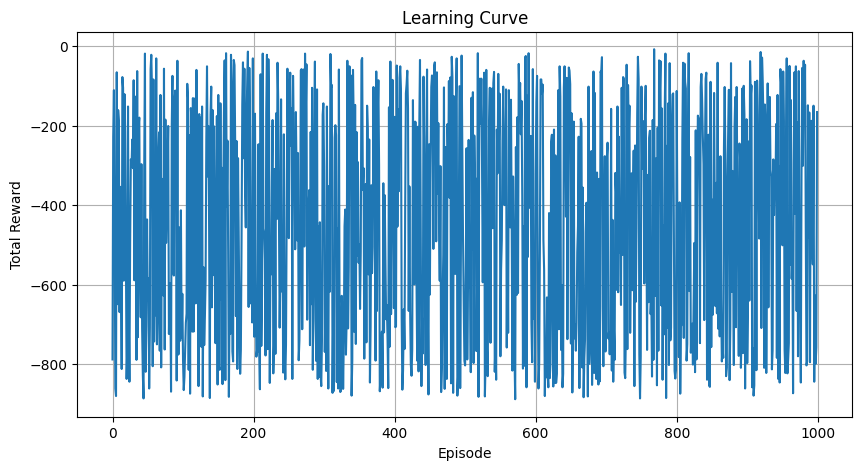

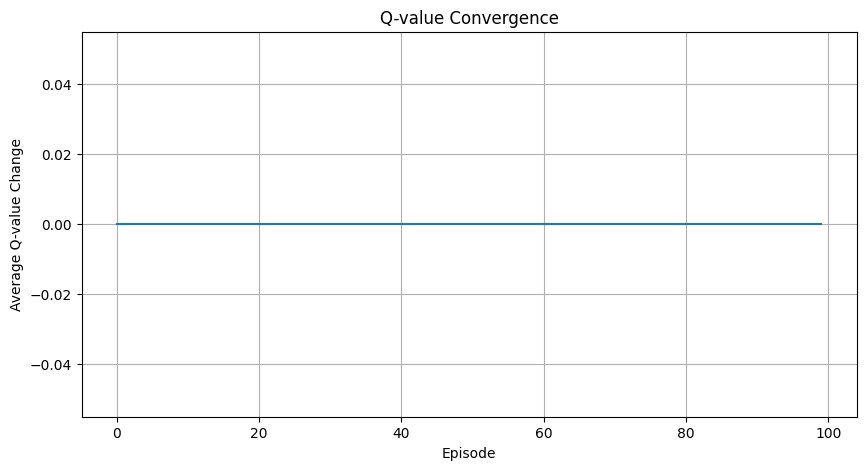

In [15]:
import matplotlib.pyplot as plt

# Lists to store data for plotting
total_rewards = []
q_value_changes = []

# Q-learning algorithm with plotting
for episode in range(num_episodes):
    state = random.choice(states)
    total_reward = 0
    
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, Q, epsilon)
        next_state = get_next_state(state, action)
        reward = get_reward(state)
        
        if next_state not in Q:
            Q[next_state] = {action: 0 for action in actions}
        
        best_next_action = min(Q[next_state], key=Q[next_state].get)
        
        Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])
        
        total_reward += reward
        state = next_state
    
    total_rewards.append(total_reward)
    
    # Calculate average change in Q-values for selected state-action pairs
    if episode % 10 == 0:  # Adjust frequency for performance
        q_value_changes.append(np.mean([abs(Q[state][action] - old_q_value) for state, actions_dict in Q.items() for action, old_q_value in actions_dict.items()]))

# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

# Plot the Q-value convergence
plt.figure(figsize=(10, 5))
plt.plot(q_value_changes)
plt.xlabel('Episode')
plt.ylabel('Average Q-value Change')
plt.title('Q-value Convergence')
plt.grid(True)
plt.show()


In [26]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
beta = 0#0.1  # Infection rate
delta = 0.2  # Recovery rate
mu_a = 0#0.01  # Arrival rate
mu_d = 0.05  # Departure rate
initial_nodes = 50  # Initial number of nodes
initial_infected = 5  # Initial number of infected nodes
total_time = 100  # Total simulation time
dt = 0.1  # Time step

# Stability condition
def stability_condition(beta, delta, mu_a, mu_d, lambda_1):
    return beta * lambda_1 / delta < 1 and mu_a < mu_d

# Initialize the network
G = nx.erdos_renyi_graph(initial_nodes, 0.1)
n = G.number_of_nodes()
adj_matrix = nx.adjacency_matrix(G).todense()
lambda_1 = np.linalg.eigvals(adj_matrix).max().real

# Initial infection states
infection_states = np.zeros(n)
infected_nodes = np.random.choice(n, initial_infected, replace=False)
infection_states[infected_nodes] = 1

# Simulation
time = np.arange(0, total_time, dt)
infection_prob = np.zeros(len(time))

for t in range(len(time)):
    # Continuous-time dynamics
    new_infections = beta * adj_matrix.dot(infection_states) * (1 - infection_states)
    recoveries = delta * infection_states
    infection_states = infection_states + (new_infections - recoveries) * dt

    # Arrivals and departures
    if np.random.rand() < mu_a * dt:
        new_node_state = np.random.rand() < 0.5  # Randomly decide if the new node is infected
        G.add_node(n, state=new_node_state)
        for node in range(n):
            if np.random.rand() < 0.1:
                G.add_edge(n, node)
        infection_states = np.append(infection_states, new_node_state)
        n += 1

    if np.random.rand() < mu_d * dt and n > 1:
        departing_node = np.random.choice(n)
        G.remove_node(departing_node)
        infection_states = np.delete(infection_states, departing_node)
        n -= 1

    # Update adjacency matrix and largest eigenvalue
    adj_matrix = nx.adjacency_matrix(G).todense()
    lambda_1 = np.linalg.eigvals(adj_matrix).max().real

    # Record infection probability
    infection_prob[t] = np.mean(infection_states)

# Plot the infection probability over time
plt.plot(time, infection_prob)
plt.xlabel('Time')
plt.ylabel('Average Infection Probability')
plt.title('Infection Probability Over Time')
plt.show()

# Check stability condition
is_stable = stability_condition(beta, delta, mu_a, mu_d, lambda_1)
print(f"The system is {'stable' if is_stable else 'unstable'} according to the stability condition.")


ValueError: shapes (45,45) and (46,) not aligned: 45 (dim 1) != 46 (dim 0)

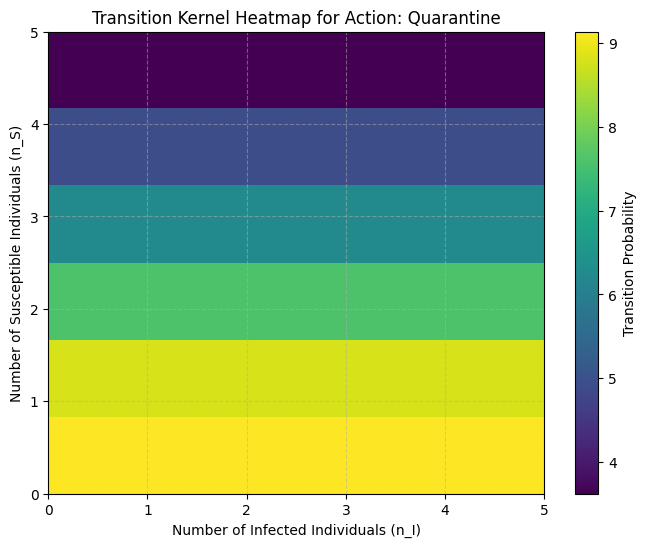

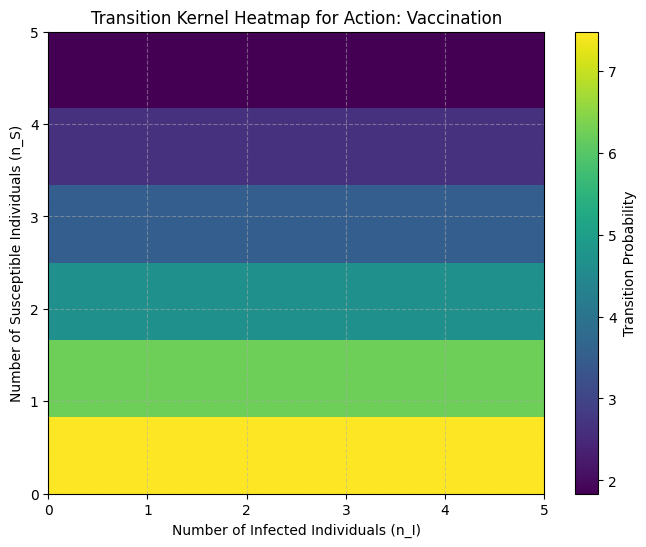

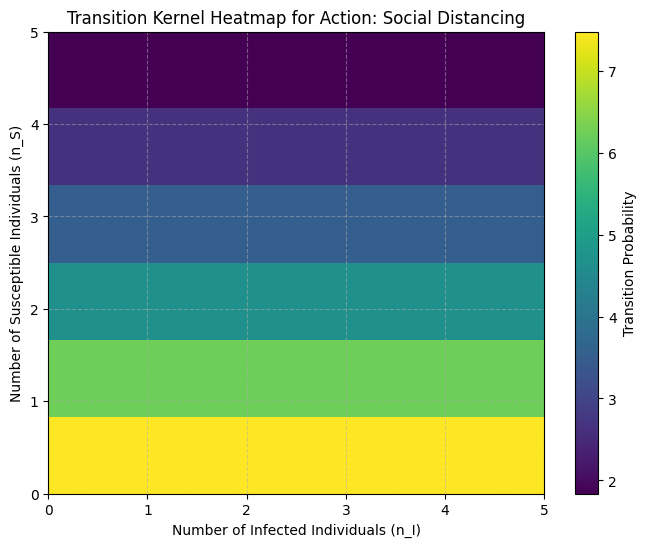

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the state space dimensions
n_I = 5  # Number of infected individuals
n_S = 5  # Number of susceptible individuals
lambda_arr = 0.1  # Arrival rate
lambda_dep = 0.05  # Departure rate

# Define the action space
actions = ['Quarantine', 'Vaccination', 'Social Distancing']

# Function to calculate transition probabilities
def transition_kernel(s_prime, s, a):
    # Unpack state tuples
    n_I_prime, n_S_prime, lambda_arr_prime, lambda_dep_prime = s_prime
    n_I, n_S, lambda_arr, lambda_dep = s

    # Here, you would define your transition probabilities based on the current state (s),
    # action taken (a), and the next state (s_prime).
    # For this example, let's just return random probabilities.

    # Example: Let's assume a simple transition probability based on the difference in infected individuals
    # and a scaling factor based on the action taken.
    # You can replace this with your actual transition kernel logic.
    diff_n_I = n_I_prime - n_I
    scaling_factor = 0.5 if a == 'Quarantine' else 1.0  # Adjust scaling factor based on action
    transition_prob = np.exp(-abs(diff_n_I) * scaling_factor) / (n_I + 1)  # Example transition probability
    return transition_prob

# Generate transition probabilities for each action
transition_probs = np.zeros((len(actions), n_I+1, n_S+1, n_I+1, n_S+1))

for i, action in enumerate(actions):
    for n_i_prime in range(n_I+1):
        for n_s_prime in range(n_S+1):
            for n_i in range(n_I+1):
                for n_s in range(n_S+1):
                    transition_probs[i, n_i_prime, n_s_prime, n_i, n_s] = transition_kernel(
                        (n_i_prime, n_s_prime, lambda_arr, lambda_dep),
                        (n_i, n_s, lambda_arr, lambda_dep),
                        action
                    )

# Plot transition kernel heatmaps for each action
for i, action in enumerate(actions):
    plt.figure(figsize=(8, 6))
    plt.title(f'Transition Kernel Heatmap for Action: {action}')
    plt.xlabel('Number of Infected Individuals (n_I)')
    plt.ylabel('Number of Susceptible Individuals (n_S)')
    plt.imshow(transition_probs[i].sum(axis=(2, 3)), cmap='viridis', origin='lower', 
               extent=[0, n_I, 0, n_S], aspect='auto')
    plt.colorbar(label='Transition Probability')
    plt.xticks(range(n_I+1))
    plt.yticks(range(n_S+1))
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.show()


/tmp/ipykernel_2558347/1521919439.py:46: RuntimeWarning: invalid value encountered in double_scalars
  P_ss[n_I_next, n_S_next] += lambda_dep * (n_I + n_S) / N
/tmp/ipykernel_2558347/1521919439.py:49: RuntimeWarning: invalid value encountered in double_scalars
  P_ss[n_I_next, n_S_next] += 1.0 - (n_I * n_S * beta / N) - (n_I * gamma)


ValueError: could not broadcast input array from shape (2,2) into shape (101,101)

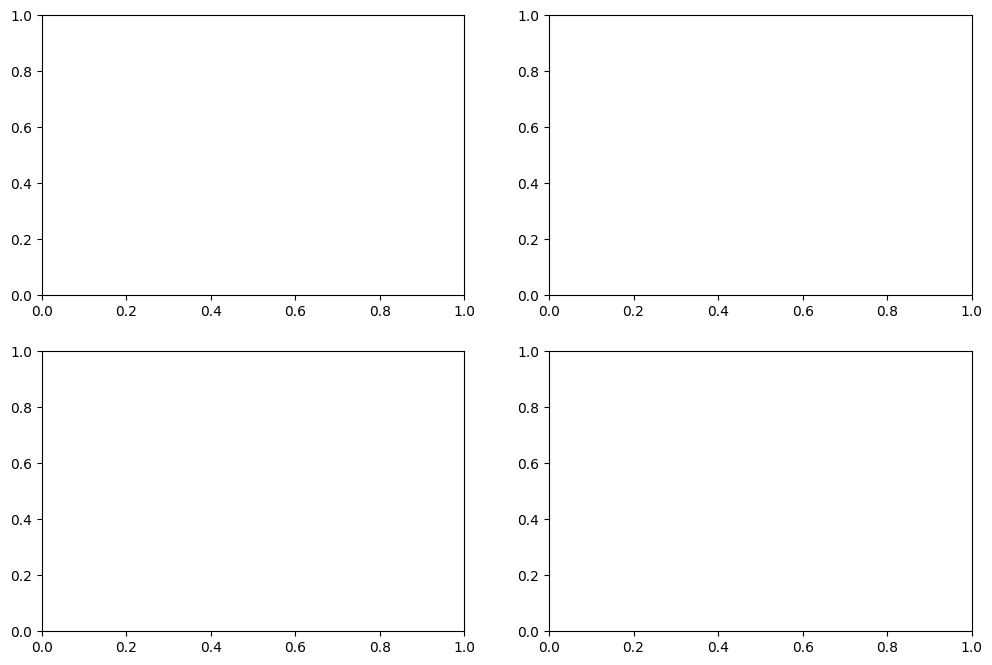

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
N = 100  # Total population size
beta = 0.5  # Infection rate
gamma = 0.2  # Recovery rate
lambda_arr_values = [0.1, 0.5]  # Arrival rates
lambda_dep_values = [0.05, 0.2]  # Departure rates

# Define the state space
n_S_range = np.arange(N + 1)
n_I_range = np.arange(N + 1)

import numpy as np

def transition_kernel(n_I, n_S, lambda_arr, lambda_dep, action):
    """
    Compute the transition kernel P(s'|s, a) for the given state and action.
    """
    N = n_I + n_S  # Total population size
    P_ss = np.zeros((N + 1, N + 1))  # Initialize the transition kernel matrix

    if action == "quarantine":
        # Implement the transition kernel for the quarantine action
        for n_I_next in range(N + 1):
            for n_S_next in range(N + 1):
                if n_I_next + n_S_next == N:
                    # No arrivals or departures under quarantine
                    if n_I_next == n_I:
                        # No new infections or recoveries
                        P_ss[n_I_next, n_S_next] = 1.0
                    else:
                        # Transitions due to infections or recoveries
                        P_ss[n_I_next, n_S_next] = 0.0

    elif action == "no_action":
        # Implement the transition kernel for the no action
        for n_I_next in range(N + 1):
            for n_S_next in range(N + 1):
                if n_I_next + n_S_next == N + 1:
                    # Account for arrivals
                    P_ss[n_I_next, n_S_next] += lambda_arr / N
                if n_I_next + n_S_next <= N:
                    # Account for departures
                    P_ss[n_I_next, n_S_next] += lambda_dep * (n_I + n_S) / N
                if n_I_next == n_I:
                    # No new infections or recoveries
                    P_ss[n_I_next, n_S_next] += 1.0 - (n_I * n_S * beta / N) - (n_I * gamma)
                else:
                    # Transitions due to infections or recoveries
                    P_ss[n_I_next, n_S_next] += (n_I * n_S * beta / N) * (n_I_next == n_I + 1) * (n_S_next == n_S - 1)
                    P_ss[n_I_next, n_S_next] += (n_I * gamma) * (n_I_next == n_I - 1) * (n_S_next == n_S + 1)

    return P_ss

# Plot the transition kernel heatmap
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, lambda_arr in enumerate(lambda_arr_values):
    for j, lambda_dep in enumerate(lambda_dep_values):
        ax = axes[i, j]
        P = np.zeros((N + 1, N + 1))
        for n_I in n_I_range:
            for n_S in n_S_range:
                P[:, :] = transition_kernel(n_I, n_S, lambda_arr, lambda_dep, "no_action")
        im = ax.imshow(P, cmap="viridis")
        ax.set_title(f"Arrival rate: {lambda_arr}, Departure rate: {lambda_dep}")
        ax.set_xlabel("Number of Infected Individuals")
        ax.set_ylabel("Number of Susceptible Individuals")
        fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()